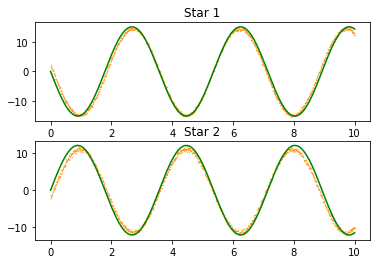

Period of revolution is: 3.571428571428571 years
Mass of lighter star is: 2.4255331388207697e+30 kg
Period of revolution is: 3.013714230090893e+30 kg


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle, BoxLeastSquares
from scipy.signal import find_peaks as fp
from astropy import units as u

data = np.loadtxt('binary_data.csv', delimiter=',')
c = 3e5
vel1 = data[:,1]*c
vel2 = data[:,2]*c
zero_crossings = np.where(np.diff(np.sign(vel1-vel2)))[0]
r_v = np.array([(vel1)[zero_crossings],(vel1)[zero_crossings]])
Radial_Velocity = np.mean(r_v)
vel1 = vel1 - Radial_Velocity
vel2 = vel2 - Radial_Velocity

frequency, power = LombScargle(data[:,0], vel1).autopower(minimum_frequency = 0.1,maximum_frequency = 2)
f_opt = frequency[np.where(power==np.max(power))]

def sine(x,V,f):
    return V*np.sin(2*np.pi*f*x)

indices1 = fp(np.abs(vel1),height=15)
v1 = np.mean(np.abs(vel1[indices1[0]]))

indices2 = fp(np.abs(vel2),height=12)
v2 = np.mean(np.abs(vel2[indices2[0]]))

p_opt = np.array([-v1,f_opt])
plt.subplot(2, 1, 1)
plt.title('Star 1')
plt.plot(data[:,0],sine(data[:,0],*p_opt),label='Best Fit',color='g')
plt.scatter(data[:,0],vel1,s=0.1,color='darkorange')

p_opt = np.array([v2,f_opt])
plt.subplot(2, 1, 2)
plt.title('Star 2')
plt.plot(data[:,0],sine(data[:,0],*p_opt),label='Best Fit',color='g')
plt.scatter(data[:,0],vel2,s=0.1,color='darkorange')

plt.show()

G = 6.674e-11
T = (1/f_opt)*u.year

T_sec = T.to(u.second)

v1 = v1*10**3
v2 = v2*10**3

M1 = (v2*(v1+v2)**2)*T_sec.value/(2*np.pi*G)
M2 = (v1*(v1+v2)**2)*T_sec.value/(2*np.pi*G)

print("Period of revolution is: {} years".format(T[0].value))
print("Mass of lighter star is: {} kg".format(M1[0]))
print("Period of revolution is: {} kg".format(M2[0]))

